In [60]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [61]:
data=pd.read_pickle('data/fitbit_sema_to_model.pkl')
data

,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,...,TENSE/ANXIOUS,TIRED,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,33.169513,52.497,38.403,16.6,0.0,0.000000,0.000,0.000000,-1.057314,2723.50,...,0,1,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
1,33.169513,52.497,38.403,16.6,0.0,0.000000,0.000,0.000000,-1.057314,2723.50,...,0,0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
2,33.169513,52.497,38.403,16.6,0.0,0.000000,0.000,0.000000,-1.057314,2723.50,...,0,0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
3,32.862197,NaN,NaN,NaN,86.0,0.800000,0.925,0.833333,-1.424669,3512.86,...,0,0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
4,32.862197,NaN,NaN,NaN,86.0,0.800000,0.925,0.833333,-1.424669,3512.86,...,0,1,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,33.277004,46.697,62.157,13.0,76.0,0.633333,0.825,0.800000,-2.266232,3800.45,...,0,0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869
4891,32.903545,71.863,25.475,18.2,72.0,0.833333,0.625,0.733333,-3.234348,1549.08,...,1,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.000000,0.587785,-0.954139
4892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1120.51,...,0,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.000000,0.587785,-0.954139
4893,34.716690,58.489,28.329,14.2,76.0,0.800000,0.600,0.933333,-2.096381,1913.30,...,1,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.000000,0.587785,-0.954139


In [62]:
data.isna().sum()

nightly_temperature                 1022
nremhr                              2296
rmssd                               2296
full_sleep_breathing_rate           2273
stress_score                        2527
sleep_points_percentage             2527
exertion_points_percentage          2527
responsiveness_points_percentage    2527
daily_temperature_variation         1063
calories                               1
filteredDemographicVO2Max            397
distance                             356
activityType                        2664
bpm                                  378
lightly_active_minutes                 1
moderately_active_minutes              1
very_active_minutes                    1
sedentary_minutes                      1
mindfulness_session                    0
resting_hr                           493
sleep_duration                       908
minutesToFallAsleep                  908
minutesAsleep                        908
minutesAwake                         908
minutesAfterWake

just drop all NaNs for now (we need to discuss how we will fill them later)

In [63]:
data=data.dropna()
data=data.reset_index()

In [64]:
data=data.drop(columns='index')
data

,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,...,TENSE/ANXIOUS,TIRED,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,34.611011,57.481,119.212,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,...,0,0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
1,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,0,0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
2,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,0,1,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
3,33.685080,54.837,43.468,13.2,82.0,0.800000,0.825,0.833333,-0.018371,1999.37,...,0,0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
4,34.519386,69.128,18.231,18.0,64.0,0.700000,0.650,0.566667,-1.329356,2154.91,...,1,0,-0.866025,0.433884,0.309017,-0.724793,0.5,-0.900969,0.951057,0.688967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,34.443552,68.439,30.237,14.6,85.0,1.000000,0.875,0.666667,-2.554325,2215.50,...,0,0,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869
1095,34.443552,68.439,30.237,14.6,85.0,1.000000,0.875,0.666667,-2.554325,2215.50,...,0,0,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869
1096,34.910560,69.491,25.809,14.6,78.0,0.866667,0.800,0.666667,-1.687950,2501.99,...,0,0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869
1097,34.910560,69.491,25.809,14.6,78.0,0.866667,0.800,0.666667,-1.687950,2501.99,...,0,0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869


In [65]:
data.columns

Index(['nightly_temperature', 'nremhr', 'rmssd', 'full_sleep_breathing_rate',
       'stress_score', 'sleep_points_percentage', 'exertion_points_percentage',
       'responsiveness_points_percentage', 'daily_temperature_variation',
       'calories', 'filteredDemographicVO2Max', 'distance', 'activityType',
       'bpm', 'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'resting_hr', 'sleep_duration', 'minutesToFallAsleep', 'minutesAsleep',
       'minutesAwake', 'minutesAfterWakeup', 'sleep_efficiency',
       'sleep_deep_ratio', 'sleep_wake_ratio', 'sleep_light_ratio',
       'sleep_rem_ratio', 'steps', 'minutes_in_default_zone_1',
       'minutes_below_default_zone_1', 'minutes_in_default_zone_2',
       'minutes_in_default_zone_3', 'age', 'gender', 'bmi', 'ALERT', 'HAPPY',
       'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS', 'TIRED',
       'month_sin', 'weekday_sin', 'week_sin', 'day_sin', 

In [66]:
data["negative_feelings"] = np.where(data['TENSE/ANXIOUS']== 1, 1, np.where(data['ALERT']==1,1, np.where(data['SAD']==1,1, np.where(data['TIRED']==1,1, 0))))
data["negative_feelings"].value_counts()

0    622
1    477
Name: negative_feelings, dtype: int64

In [67]:
data["positive_feelings"] = np.where(data['HAPPY']== 1, 1, np.where(data['NEUTRAL']==1,1, np.where(data['RESTED/RELAXED']==1,1, 0)))
data["positive_feelings"].value_counts()

1    622
0    477
Name: positive_feelings, dtype: int64

In [68]:
data.columns

Index(['nightly_temperature', 'nremhr', 'rmssd', 'full_sleep_breathing_rate',
       'stress_score', 'sleep_points_percentage', 'exertion_points_percentage',
       'responsiveness_points_percentage', 'daily_temperature_variation',
       'calories', 'filteredDemographicVO2Max', 'distance', 'activityType',
       'bpm', 'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'resting_hr', 'sleep_duration', 'minutesToFallAsleep', 'minutesAsleep',
       'minutesAwake', 'minutesAfterWakeup', 'sleep_efficiency',
       'sleep_deep_ratio', 'sleep_wake_ratio', 'sleep_light_ratio',
       'sleep_rem_ratio', 'steps', 'minutes_in_default_zone_1',
       'minutes_below_default_zone_1', 'minutes_in_default_zone_2',
       'minutes_in_default_zone_3', 'age', 'gender', 'bmi', 'ALERT', 'HAPPY',
       'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS', 'TIRED',
       'month_sin', 'weekday_sin', 'week_sin', 'day_sin', 

In [69]:
import pycaret
from pycaret.classification import *

In [70]:
df = data.drop(columns=['ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS','TIRED','positive_feelings'])

In [71]:
grid = setup(data=df, target='negative_feelings', fix_imbalance = True, silent=True)

,Description,Value
0,session_id,3623
1,Target,negative_feelings
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1099, 47)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [72]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6476,0.6675,0.5902,0.5806,0.5833,0.2786,0.2802,0.1540
lightgbm,Light Gradient Boosting Machine,0.6385,0.6732,0.5717,0.5683,0.5688,0.2579,0.2589,0.0700
rf,Random Forest Classifier,0.6372,0.6651,0.5686,0.5665,0.5671,0.2550,0.2554,0.0800
et,Extra Trees Classifier,0.6308,0.6454,0.5001,0.5699,0.5312,0.2289,0.2313,0.1500
dt,Decision Tree Classifier,0.6255,0.6209,0.4843,0.5623,0.5184,0.2151,0.2178,0.0110
ada,Ada Boost Classifier,0.6059,0.6291,0.5433,0.5320,0.5358,0.1937,0.1946,0.0500
dummy,Dummy Classifier,0.5813,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0120
ridge,Ridge Classifier,0.5760,0.0000,0.5373,0.5010,0.5166,0.1410,0.1418,0.0070
lda,Linear Discriminant Analysis,0.5748,0.5947,0.5376,0.4977,0.5146,0.1384,0.1398,0.0150
knn,K Neighbors Classifier,0.5710,0.5943,0.5683,0.4892,0.5246,0.1379,0.1401,0.0140


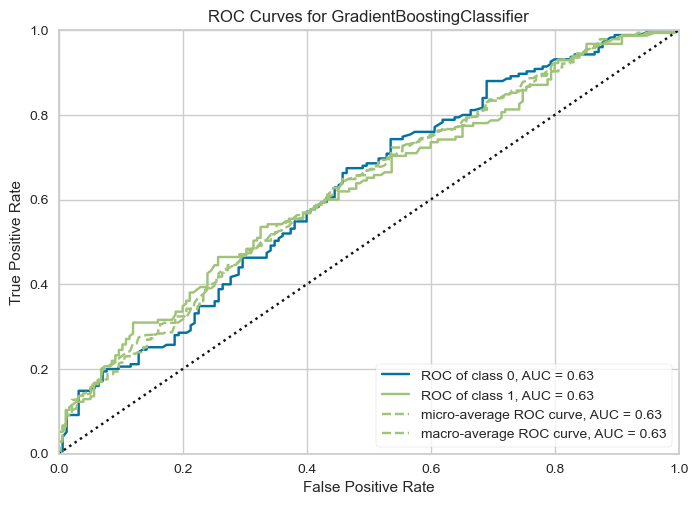

In [73]:
plot_model(best, plot = 'auc')

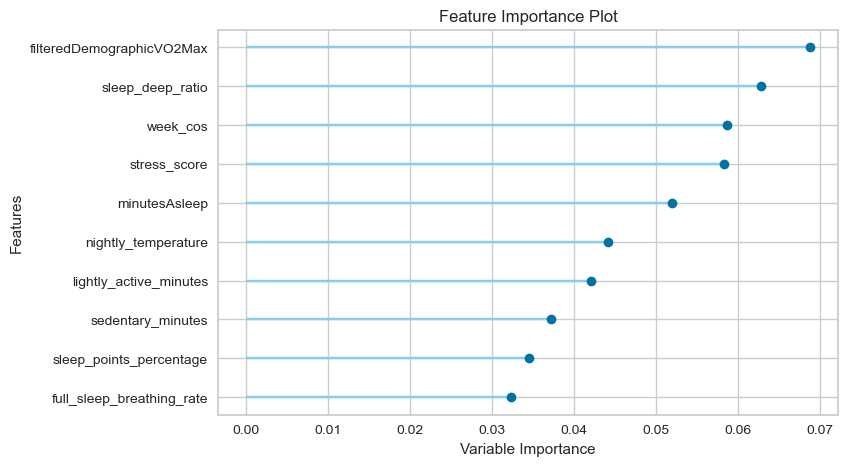

In [74]:
plot_model(best, plot='feature')

In [75]:
df = data.drop(columns=['ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS','TIRED','negative_feelings'])

In [76]:
grid = setup(data=df, target='positive_feelings', fix_imbalance = True, silent=True)

,Description,Value
0,session_id,6063
1,Target,positive_feelings
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1099, 47)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [77]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6307,0.6397,0.6819,0.6752,0.6758,0.2455,0.2482,0.1040
gbc,Gradient Boosting Classifier,0.6242,0.6604,0.6609,0.6744,0.6642,0.2359,0.2393,0.1560
lightgbm,Light Gradient Boosting Machine,0.6215,0.6438,0.6610,0.6705,0.6618,0.2303,0.2340,0.1230
et,Extra Trees Classifier,0.6125,0.6234,0.6063,0.6816,0.6368,0.2234,0.2286,0.1220
ada,Ada Boost Classifier,0.6034,0.6272,0.6656,0.6462,0.6545,0.1876,0.1890,0.0640
dt,Decision Tree Classifier,0.5734,0.5875,0.5418,0.6511,0.5872,0.1525,0.1575,0.0130
lda,Linear Discriminant Analysis,0.5669,0.6045,0.6040,0.6245,0.6117,0.1211,0.1231,0.0160
ridge,Ridge Classifier,0.5617,0.0000,0.5945,0.6181,0.6038,0.1123,0.1137,0.0120
knn,K Neighbors Classifier,0.5410,0.5579,0.5603,0.6019,0.5788,0.0751,0.0754,0.0220
lr,Logistic Regression,0.5148,0.5044,0.6563,0.5581,0.5861,-0.0139,-0.0145,0.0140


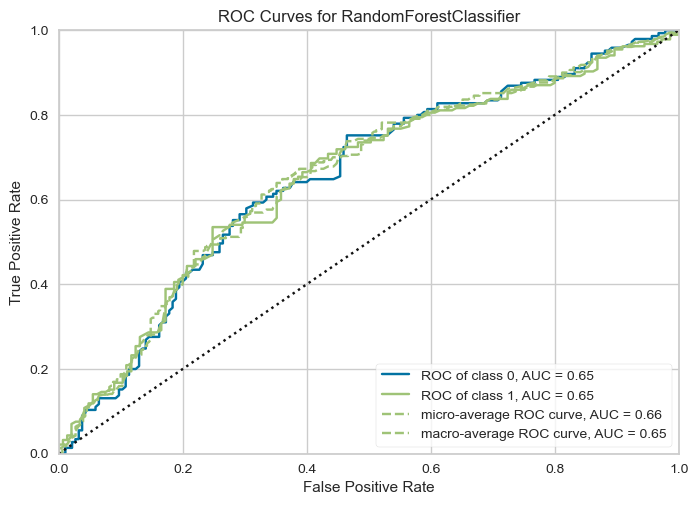

In [78]:
plot_model(best, plot = 'auc')

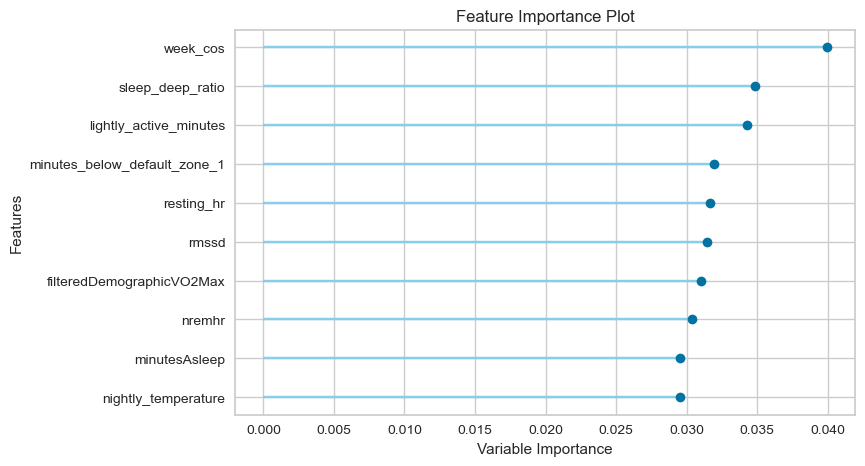

In [79]:
plot_model(best, plot = 'feature')

In [102]:
df = data.drop(columns=['HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'ALERT', 'SAD','TENSE/ANXIOUS','negative_feelings','positive_feelings'])

In [103]:
grid = setup(data=df, target='TIRED', fix_imbalance = True, silent=True)

,Description,Value
0,session_id,1204
1,Target,TIRED
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1099, 47)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [104]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.7971,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0140
gbc,Gradient Boosting Classifier,0.7698,0.5732,0.2358,0.3803,0.2863,0.1618,0.1690,0.1800
et,Extra Trees Classifier,0.7594,0.5705,0.2304,0.3572,0.2750,0.1416,0.1479,0.1050
lightgbm,Light Gradient Boosting Machine,0.7516,0.5691,0.2429,0.3209,0.2741,0.1336,0.1338,0.1090
rf,Random Forest Classifier,0.7424,0.5690,0.2692,0.3336,0.2915,0.1404,0.1432,0.0990
dt,Decision Tree Classifier,0.7386,0.5533,0.2242,0.3082,0.2549,0.1040,0.1070,0.0100
ada,Ada Boost Classifier,0.7373,0.5599,0.2317,0.3242,0.2646,0.1103,0.1159,0.0630
svm,SVM - Linear Kernel,0.6192,0.0000,0.3000,0.0610,0.1014,0.0000,0.0000,0.0110
lda,Linear Discriminant Analysis,0.6163,0.5439,0.4346,0.2486,0.3151,0.0772,0.0825,0.0140
knn,K Neighbors Classifier,0.6020,0.5480,0.4100,0.2295,0.2924,0.0464,0.0507,0.0150


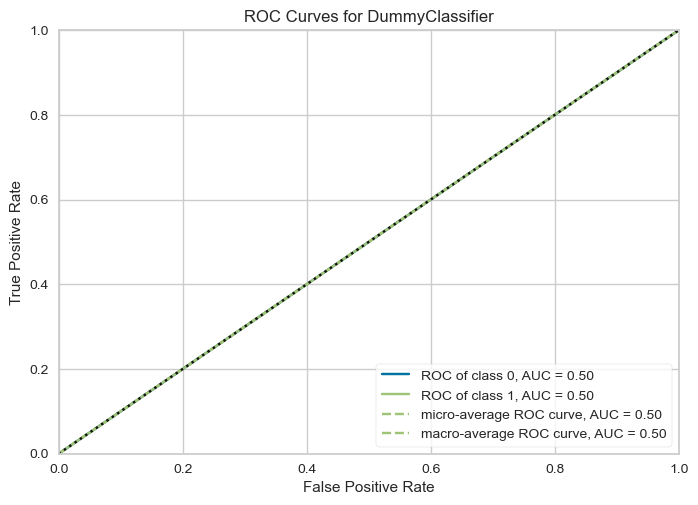

In [105]:
plot_model(best, plot = 'auc')

In [106]:
plot_model(best, plot = 'feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.